# Principal Component Analysis of Raman Spectra

## Setup

Import required packages

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import style
from itertools import cycle
from sklearn.decomposition import PCA

from sklearn.preprocessing import Normalizer

from _lib.raman_lib.preprocessing import (BaselineCorrector,
                                     RangeLimiter,
                                     SavGolFilter)

from _lib.raman_lib.misc import load_data

style.use("default")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

Settings

In [71]:
# Path where the data is stored
data_paths = [
    r"/Users/Praktikum/Documents/bacteria_species/05_Bacteria_Spectra_tsv_wo_chemical_grouped/S-cohnii-DSM20261",
    r"/Users/Praktikum/Documents/bacteria_species/05_Bacteria_Spectra_tsv_wo_chemical_grouped/S-warneri-DSM20316"
    
              ]

# Spectral range to analyze
# Use 'None' to use the whole range'
wn_min = 500
wn_max = 1600

# param for plot margins
plt_mrgn = 250

# Window size for smoothing the spectra
# Higher means stronger smoothing
sg_window = 25

In [72]:
data = pd.DataFrame()

for path in data_paths:
    data = pd.concat([data, load_data(path)], ignore_index=True)  
if "file" in data.columns:
    X = data.drop(columns=["label", "file"])
    df_X = data.drop(columns=["label", "file"])
else:
    X = data.drop(columns=[""])
    df_X = data.drop(columns=[""])
    
wns = np.asarray(X.columns.astype(float))

X = np.asarray(X)

y = np.asarray(data.label)
y, y_key = pd.factorize(y, sort=True)

for i, label in enumerate(y_key):
    print(f"{label}: {i}")

S-cohnii-DSM20261: 0
S-warneri-DSM20316: 1


# Original Spectrum

duplicated
Empty DataFrame
Columns: [-57.0, -53.0, -49.0, -45.0, -41.0, -37.0, -33.0, -29.0, -25.0, -21.0, -17.0, -13.0, -9.0, -5.0, -1.0, 2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0, 46.0, 50.0, 54.0, 58.0, 62.0, 66.0, 70.0, 74.0, 78.0, 81.0, 85.0, 89.0, 93.0, 97.0, 101.0, 105.0, 109.0, 113.0, 117.0, 121.0, 125.0, 129.0, 133.0, 137.0, 141.0, 144.0, 148.0, 152.0, 156.0, 160.0, 164.0, 168.0, 172.0, 176.0, 180.0, 184.0, 187.0, 191.0, 195.0, 199.0, 203.0, 207.0, 211.0, 215.0, 219.0, 222.0, 226.0, 230.0, 234.0, 238.0, 242.0, 246.0, 250.0, 253.0, 257.0, 261.0, 265.0, 269.0, 273.0, 277.0, 280.0, 284.0, 288.0, 292.0, 296.0, 300.0, 303.0, 307.0, 311.0, 315.0, 319.0, 323.0, 327.0, 330.0, ...]
Index: []

[0 rows x 1024 columns]


Text(0, 0.5, 'Intensity (-)')

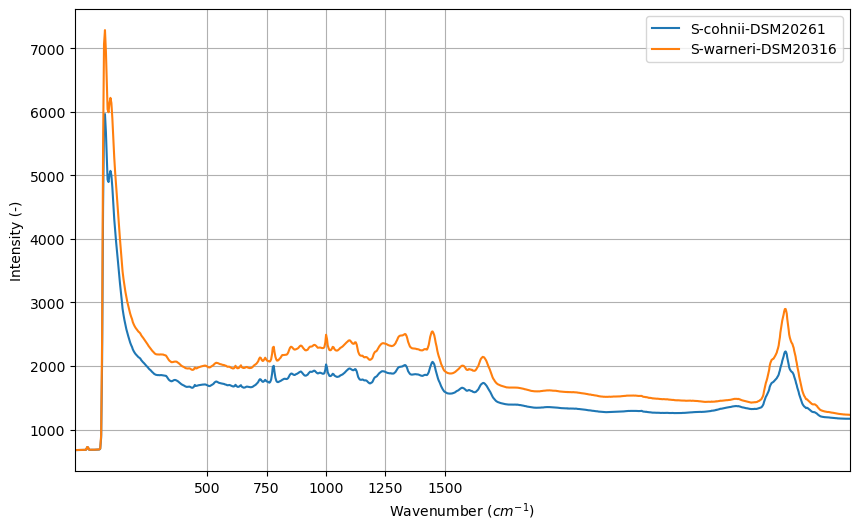

In [73]:
print("duplicated")
print(df_X[df_X.index.duplicated()])

for i in range(len(y_key)):
    plt.plot(wns, X[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(wn_min, wn_max, plt_mrgn))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

# Original Spectrum - standard deviation


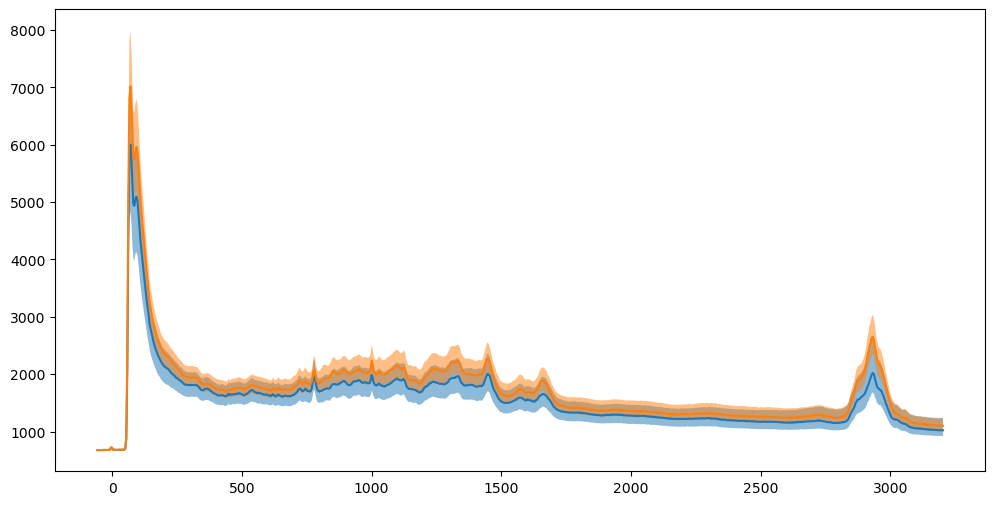

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))
for label, group in df_X.groupby(data.label):
    ax.plot(wns, group.median(axis=0), label=label)
    ax.fill_between(wns, group.quantile(q=0.25, axis=0), group.quantile(q=0.75, axis=0), alpha=0.5)


# Baseline corrected Spectrum

Text(0, 0.5, 'Intensity (-)')

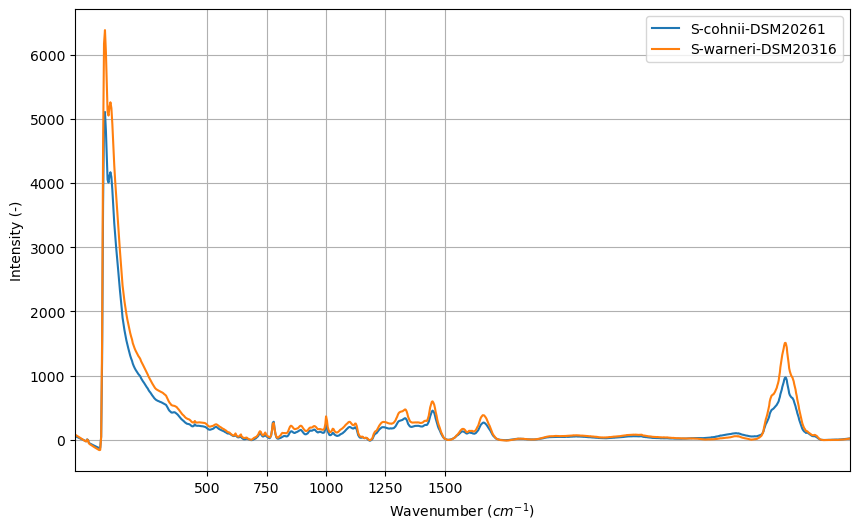

In [75]:
X_bl = BaselineCorrector().fit_transform(X)

for i in range(len(y_key)):
    plt.plot(wns, X_bl[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(wn_min, wn_max, plt_mrgn))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

# Baseline corrected Spectrum - standard deviation

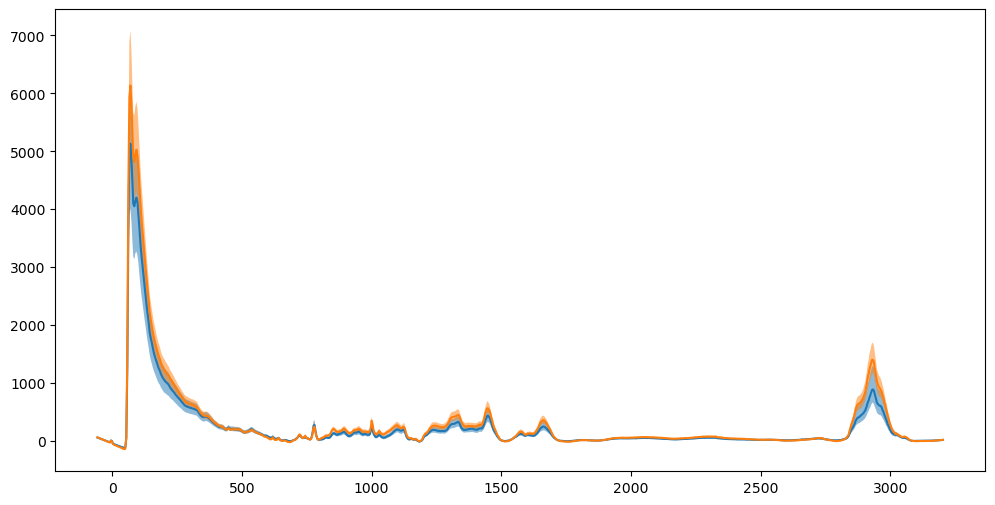

In [76]:
df_X_bl=pd.DataFrame(X_bl)
fig, ax = plt.subplots(figsize=(12, 6))
for label, group in df_X_bl.groupby(data.label):
    ax.plot(wns, group.median(axis=0), label=label)
    ax.fill_between(wns, group.quantile(q=0.25, axis=0), group.quantile(q=0.75, axis=0), alpha=0.5)

# Range limited Spectrum

Text(0, 0.5, 'Intensity (-)')

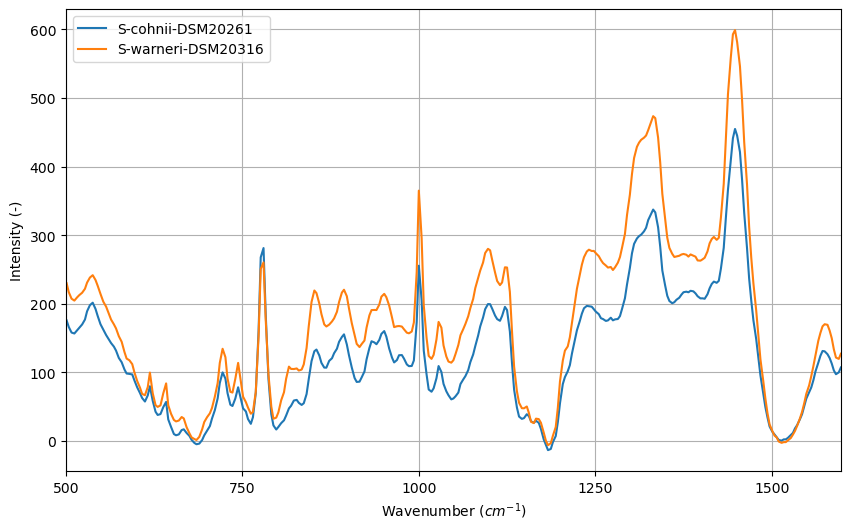

In [77]:
rl = RangeLimiter(lim=(wn_min, wn_max), reference=wns)
X_rl = rl.fit_transform(X_bl)
wns_reduced = wns[rl.lim_[0]:rl.lim_[1]]

for i in range(len(y_key)):
    plt.plot(wns_reduced, X_rl[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(wn_min, wn_max, plt_mrgn))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

# Range limited Spectrum - standard deviation

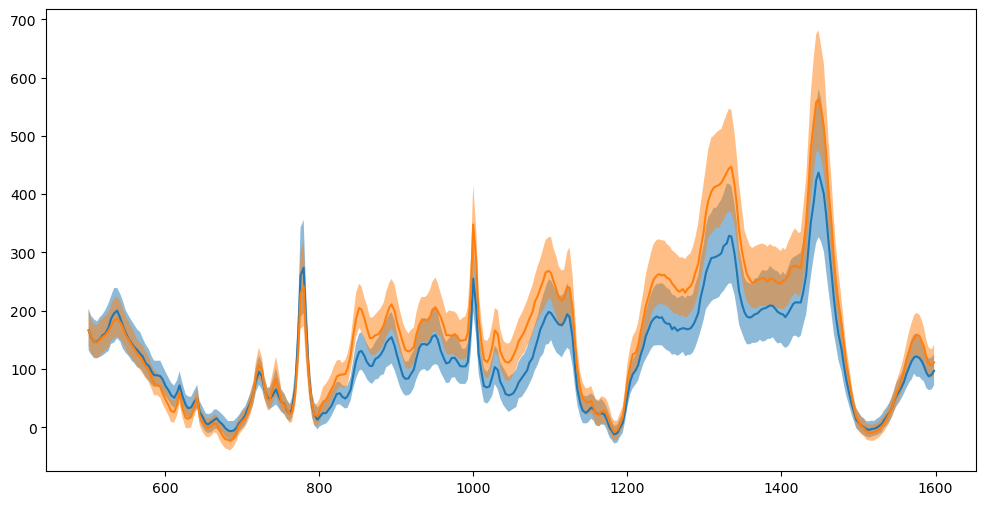

In [78]:
df_X_rl=pd.DataFrame(X_rl)
fig, ax = plt.subplots(figsize=(12, 6))
for label, group in df_X_rl.groupby(data.label):
    ax.plot(wns_reduced, group.median(axis=0), label=label)
    ax.fill_between(wns_reduced, group.quantile(q=0.25, axis=0), group.quantile(q=0.75, axis=0), alpha=0.5)

# Smoothed Spectrum

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0, 0.5, 'Intensity (-)')

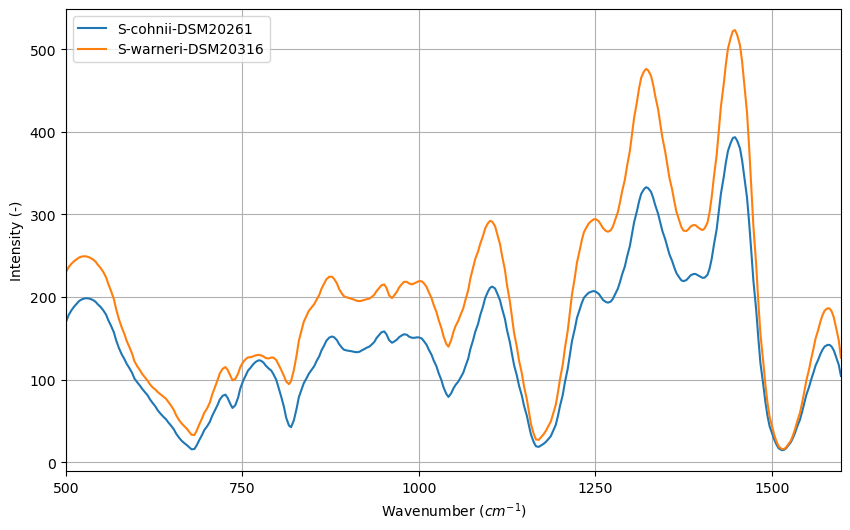

In [79]:
X_smooth = SavGolFilter(window=sg_window).fit_transform(X_rl)

for i in range(len(y_key)):
    plt.plot(wns_reduced, X_smooth[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(wn_min, wn_max, plt_mrgn))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

# Smoothed Spectrum - standard deviation

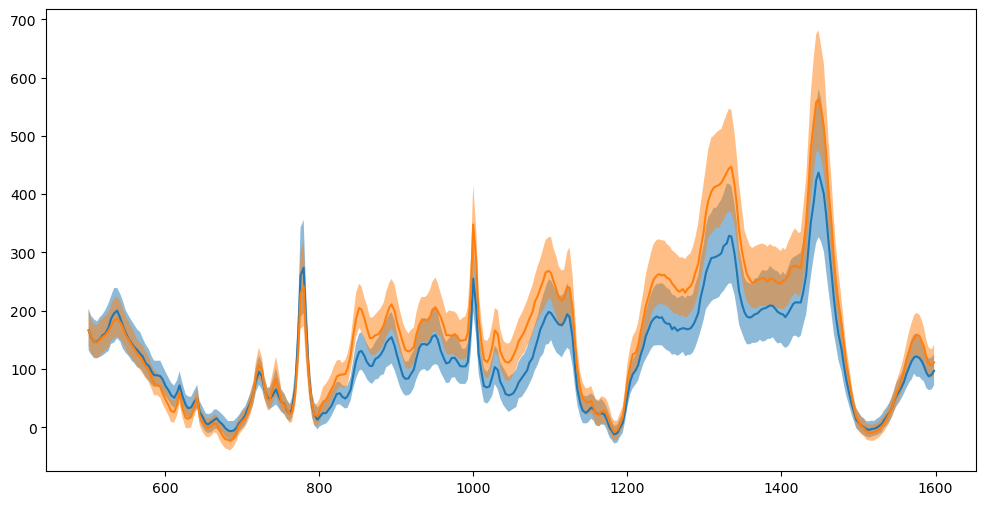

In [80]:
df_X_smooth=pd.DataFrame(X_smooth)
fig, ax = plt.subplots(figsize=(12, 6))
for label, group in df_X_rl.groupby(data.label):
    ax.plot(wns_reduced, group.median(axis=0), label=label)
    ax.fill_between(wns_reduced, group.quantile(q=0.25, axis=0), group.quantile(q=0.75, axis=0), alpha=0.5)

# Normalized Spectrum

Text(0, 0.5, 'Intensity (-)')

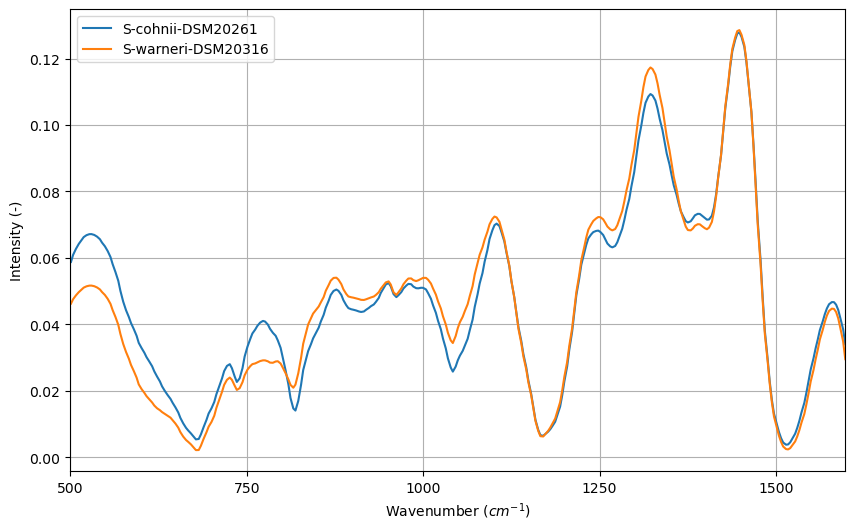

In [81]:
X_norm = Normalizer().fit_transform(X_smooth)

for i in range(len(y_key)):
    plt.plot(wns_reduced, X_norm[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(wn_min, wn_max, plt_mrgn))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

# Normalized Spectrum - standard deviation

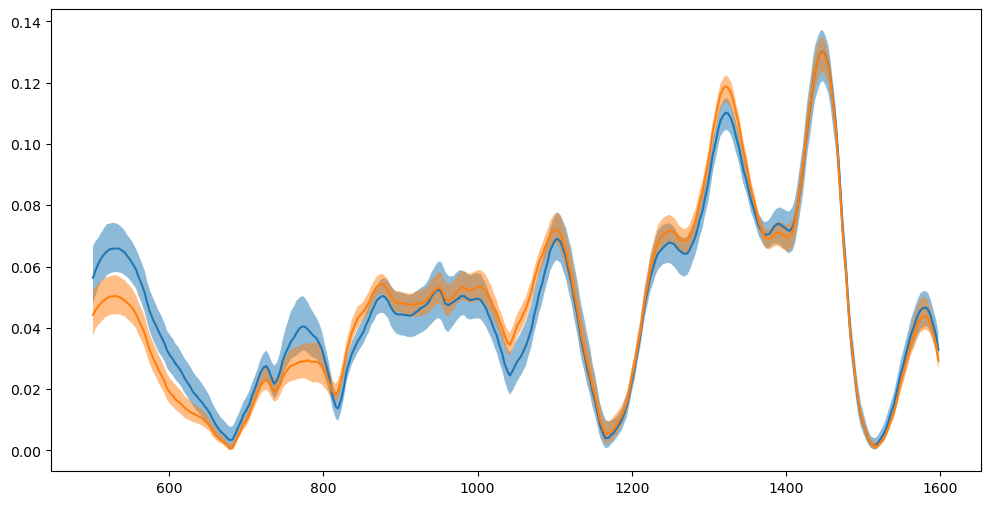

In [82]:
df_X_norm=pd.DataFrame(X_norm)
fig, ax = plt.subplots(figsize=(12, 6))
for label, group in df_X_norm.groupby(data.label):
    ax.plot(wns_reduced, group.median(axis=0), label=label)
    ax.fill_between(wns_reduced, group.quantile(q=0.25, axis=0), group.quantile(q=0.75, axis=0), alpha=0.5)

# Principal Component Analysis

In [83]:
n_components = 7

In [84]:
# Run PCA with selected no. of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_norm)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


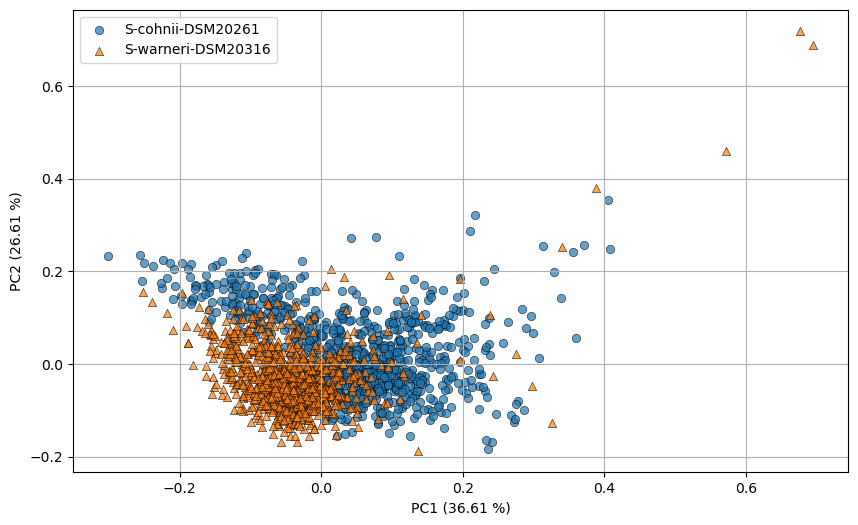

In [85]:
# simple score plot for PC1 and PC2
shapes = ["o", "^", "s", "d", "v", "p", "P", "*", "<", ">"]

for i, marker in zip(range(len(y_key)), cycle(shapes)):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], label = y_key[i], marker=marker, edgecolors="k", linewidths=0.5, alpha=0.7)

plt.xlabel(f"PC1 ({(pca.explained_variance_ratio_[0] * 100):.2f} %)")
plt.ylabel(f"PC2 ({(pca.explained_variance_ratio_[1] * 100):.2f} %)")
plt.legend()

plt.grid()

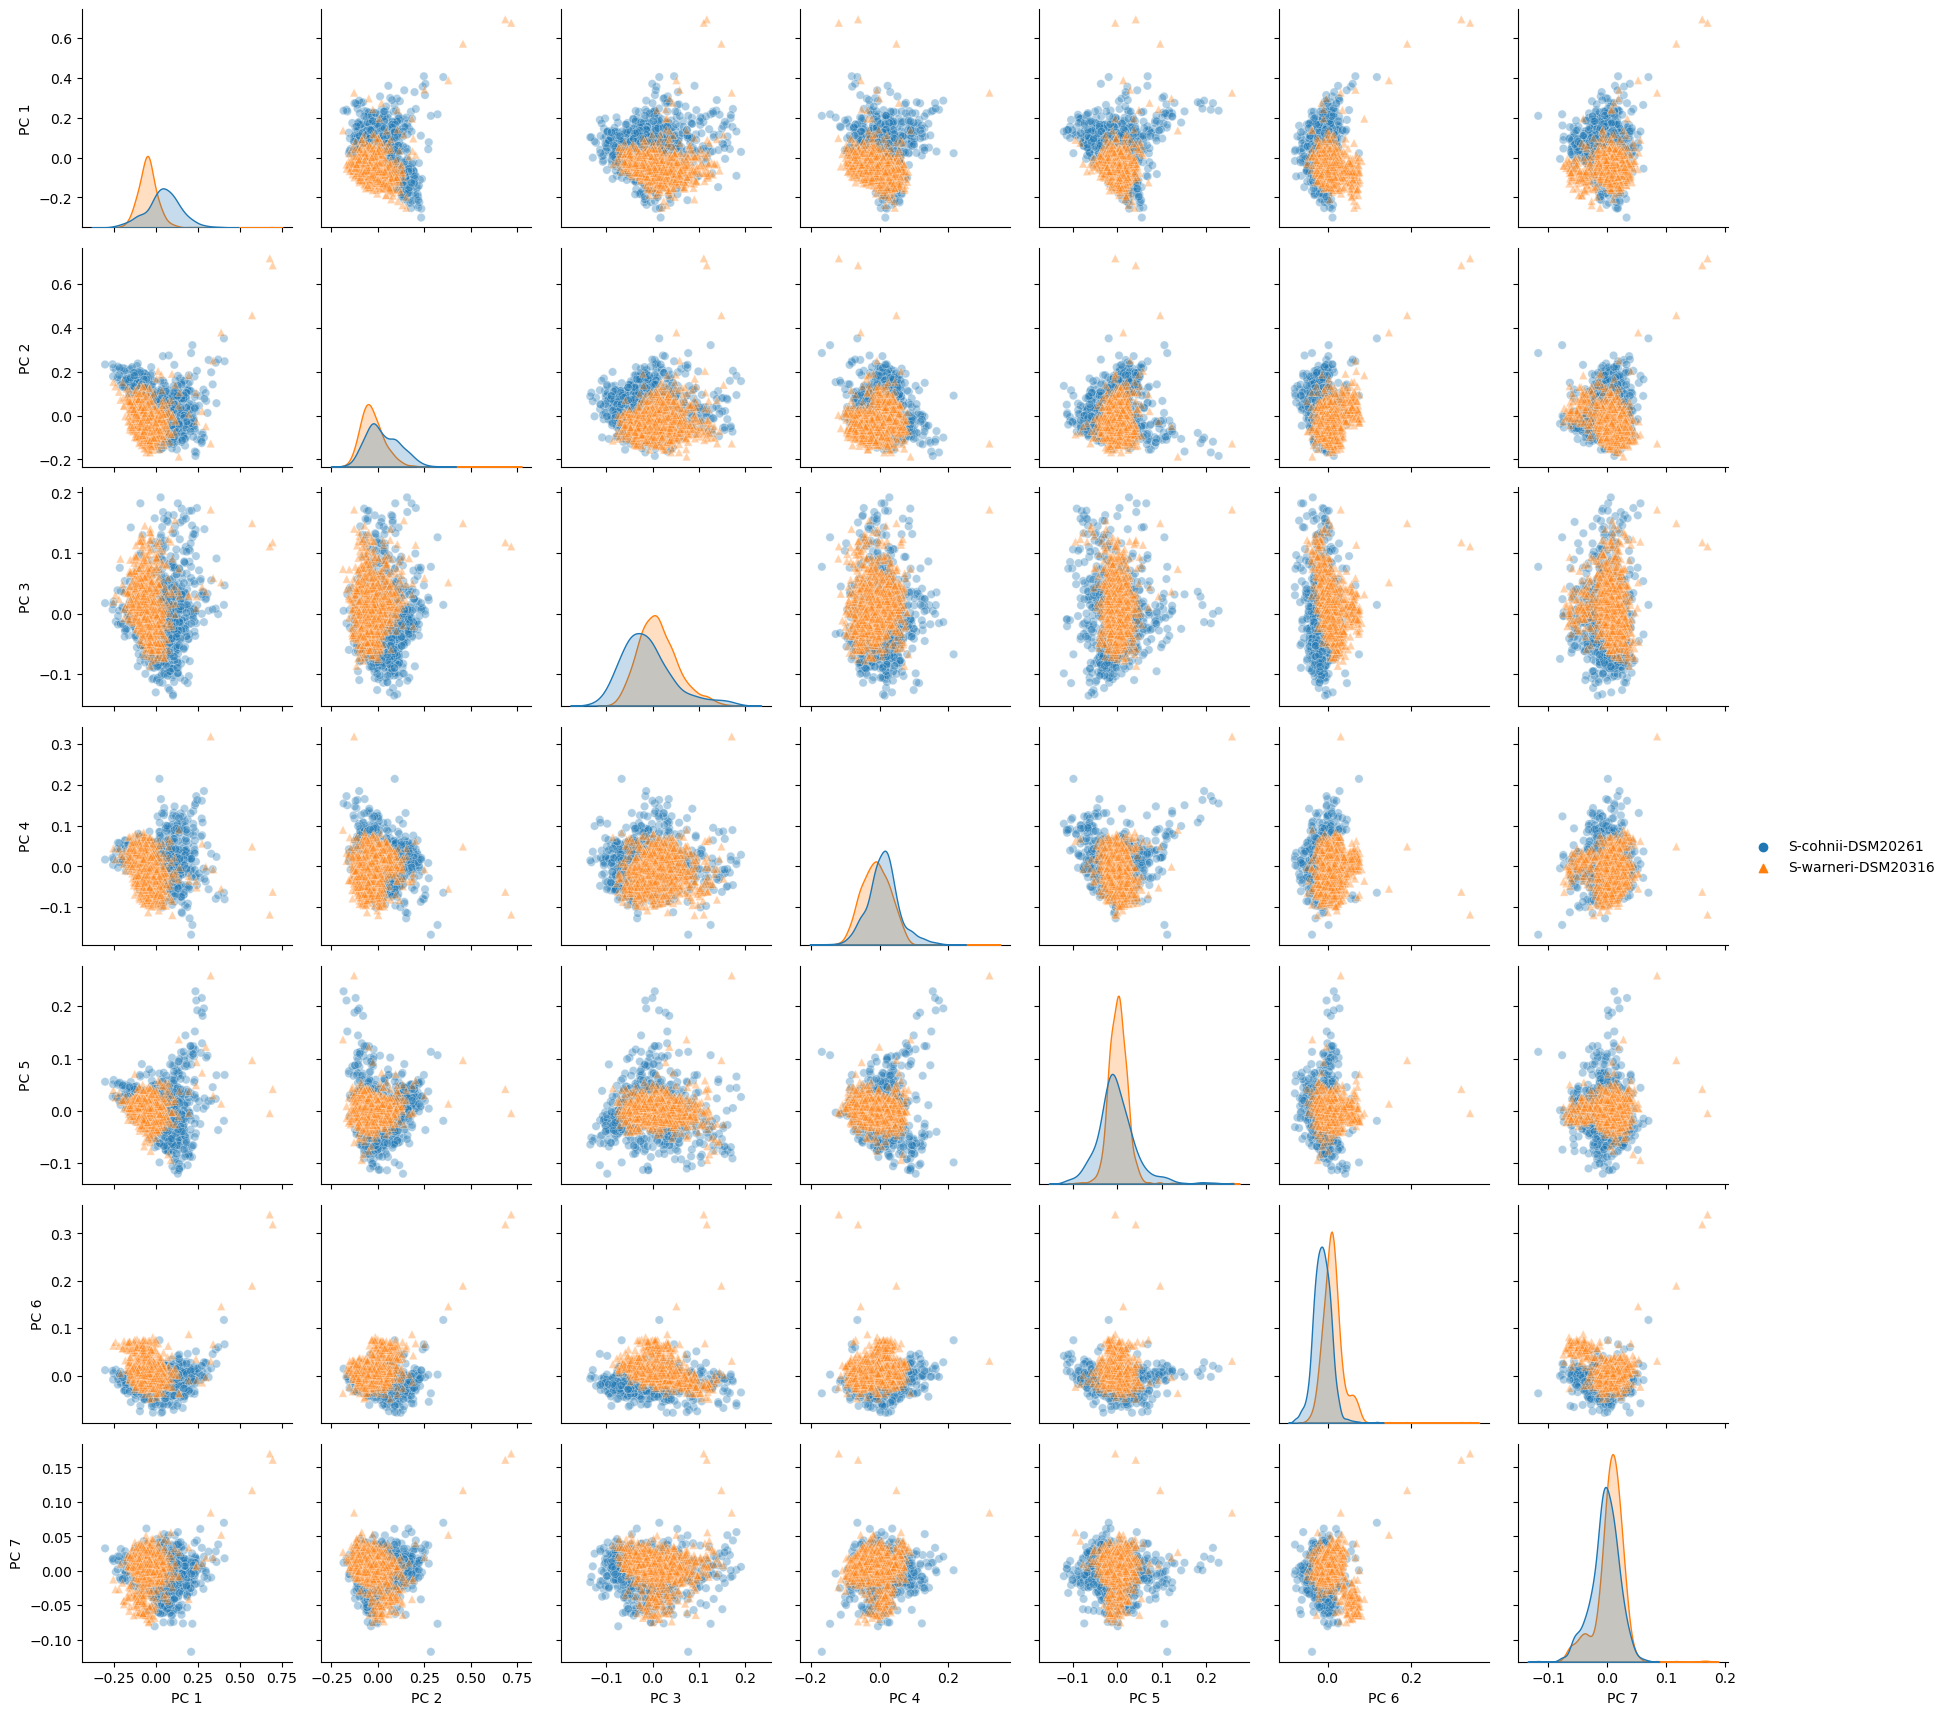

In [86]:
# Pairwise score plot with density plots on the diagonal
plot_data = pd.DataFrame(X_pca, columns=[f"PC {i+1}" for i in range(n_components)])
plot_data.insert(0, "Class", y_key[y])

grid = sns.PairGrid(plot_data, hue="Class", hue_order=y_key)
grid.map_offdiag(sns.scatterplot,
                 alpha = 0.35,
                 style=plot_data["Class"],
                 style_order=y_key,
                 markers=[s for i, s in zip(y_key, cycle(shapes))])
grid.map_diag(sns.kdeplot, fill=True)
grid.set()
grid.add_legend(title="")

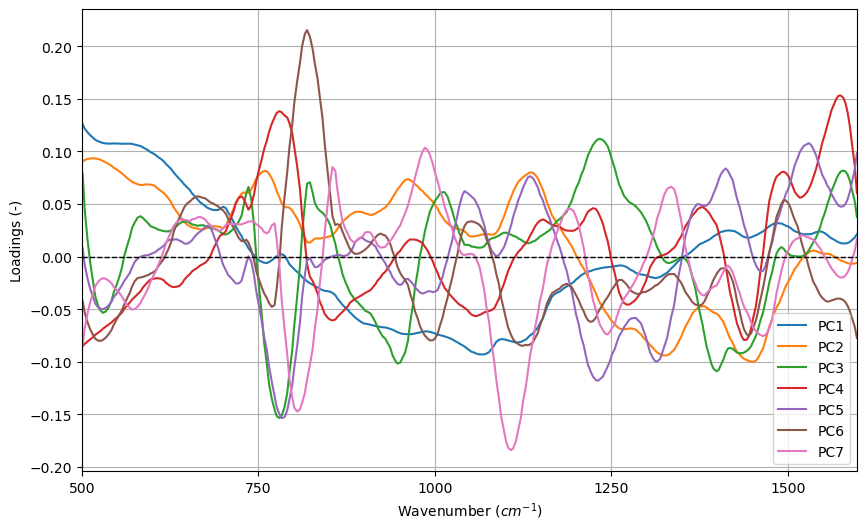

In [87]:
for i, component in enumerate(pca.components_):
    plt.plot(wns_reduced, component, label=f"PC{i+1}")


plt.axhline(y=0, linestyle="--", linewidth=1, color="k")

plt.margins(x=0)

plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Loadings (-)")

plt.xticks(range(wn_min, wn_max, plt_mrgn))

plt.legend()

plt.grid()